Various plots with the stellar parameters

In [235]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from matplotlib import cm
import lightkurve as lk


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [202]:
params = Table.read('stellar_parameters.csv')

In [8]:
params.colnames

['Target',
 'RAJ2000',
 'DEJ2000',
 'Jmag',
 'J_e',
 'Hmag',
 'H_e',
 'Kmag',
 'K_e',
 'Rmag',
 'R_e',
 'spt',
 'L_bol',
 'L_bol_e',
 'Mass',
 'Mass_e',
 'Radius',
 'Radius_e',
 'Teff',
 'Teff_e',
 'parallax',
 'distance']

Text(0, 0.5, 'Radius (R$_{\\odot}$)')

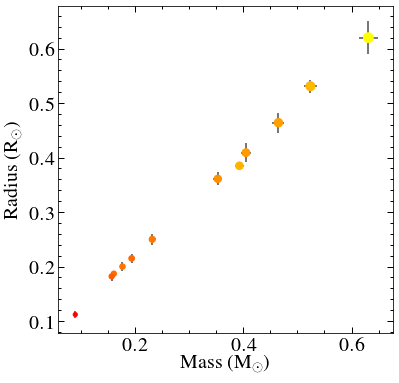

In [55]:
sizes = params['Radius']/np.mean(params['Radius'])*50

plt.figure(figsize=(6,6))
plt.errorbar(params['Mass'], params['Radius'], xerr=params['Mass_e'], yerr=params['Radius_e'], ls='none', c='k', alpha=0.7, zorder=-1)
plt.scatter(params['Mass'], params['Radius'],  marker='o', c = params['Teff'], cmap='autumn', s=sizes)#, edgecolor='k')

plt.xlabel('Mass (M$_{\odot}$)')
plt.ylabel('Radius (R$_{\odot}$)')

(4200, 2400)

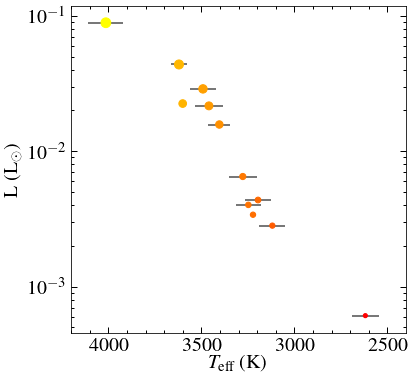

In [50]:


plt.figure(figsize=(6,6))
lsun = const.L_sun.to(u.erg/u.s).value
lstars = params['L_bol']/lsun
lstars_e = (params['L_bol_e'] / params['L_bol']) * lstars

plt.errorbar(params['Teff'], lstars, xerr=params['Teff_e'], yerr=lstars_e, ls='none', zorder=-1, c='k', alpha=0.7)
plt.scatter(params['Teff'], lstars,  marker='o', c = params['Teff'], cmap='autumn', s=sizes)

plt.xlabel('$T_{\mathrm{eff}}$ (K)')
plt.ylabel('L (L$_{\odot}$)')
plt.yscale('log')
plt.xlim(4200, 2400)

In [26]:
const.L_sun.to(u.erg/u.s)

<Quantity 3.828e+33 erg / s>

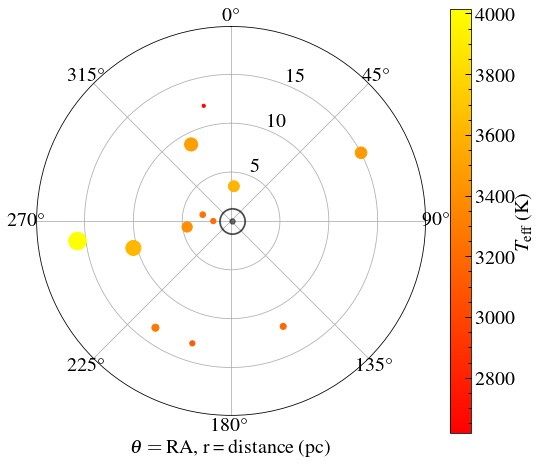

In [182]:
sunsize=800
sizes = (params['Radius']**2)*sunsize
#print(sizes)

theta = np.array(params['RAJ2000'])*np.pi/180
r = params['distance']
#print(max(r))

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111, projection='polar', theta_direction=-1)
ax.set_theta_zero_location('N')
c =ax.scatter(theta, r, c = params['Teff'], cmap='autumn', s=sizes, zorder=10)
ax.scatter(0,0, marker='$\odot$', s =sunsize, c='k', zorder=5, alpha=0.5)
#ax.set_rmin()
ax.set_rmax(19.9)
#
ax.set_rticks([5,10,15])
#ax.set_rlabels(['1'], '2', '3')
#ax.set_theta_label('distance')
#ax.set_theta_label('Ra')
plt.colorbar(c, ax=ax, label = '$T_{\mathrm{eff}}$ (K)')
#ax.annotate('')
ax.set_xlabel(r'$\theta=$\,RA, r\,=\,distance (pc)')
plt.tight_layout()
#plt.legend()
#plt.savefig('mm_map.png', dpi=100)



In [183]:
#params

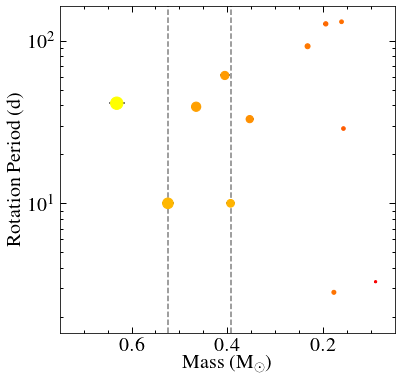

In [217]:
plt.figure(figsize=(6,6))

prot = np.array(params['P_rot_d'])
#print(prot)
norot_mass = params['Mass'][prot < 0]
for i in range(len(prot)):
    if prot[i] < 0:
        prot[i] = 10
#print(prot)


plt.errorbar(params['Mass'], prot , xerr=params['Mass_e'], ls='none', c='k', alpha=0.7, zorder=-1)
plt.scatter(params['Mass'], prot,  marker='o', c = params['Teff'], cmap='autumn', s=sizes*0.5)#, edgecolor='k')
[plt.axvline(line, ls='--', c='k', alpha=0.5, zorder=-1) for line in norot_mass]
plt.xlabel('Mass (M$_{\odot}$)')
plt.ylabel('Rotation Period (d)')
plt.xlim(0.75, 0.05)
plt.yscale('log')

In [218]:
#params

All on one plot

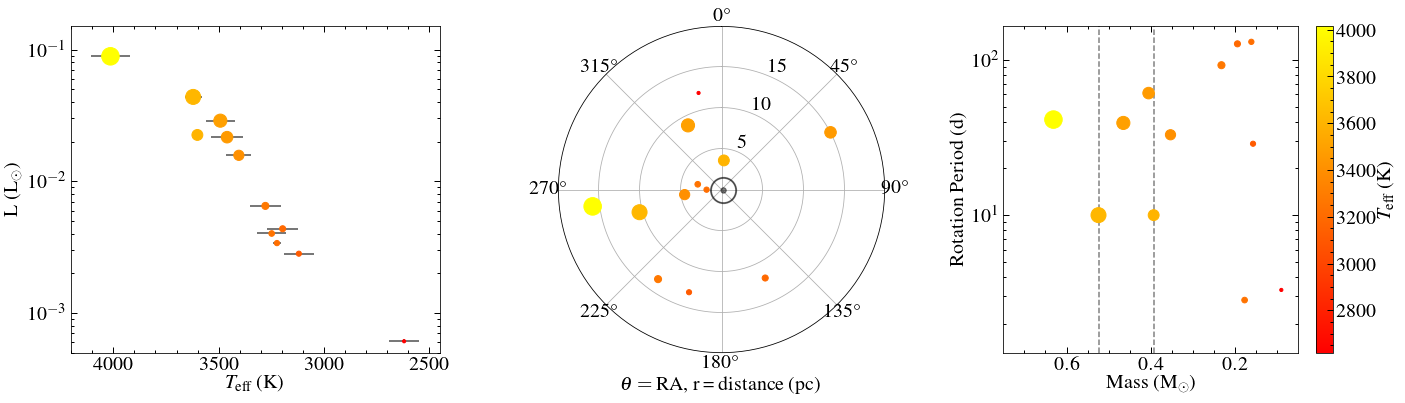

In [233]:

fig = plt.figure(figsize=(20, 6))

plt.subplot(131)
lsun = const.L_sun.to(u.erg/u.s).value
lstars = params['L_bol']/lsun
lstars_e = (params['L_bol_e'] / params['L_bol']) * lstars

plt.errorbar(params['Teff'], lstars, xerr=params['Teff_e'], yerr=lstars_e, ls='none', zorder=-1, c='k', alpha=0.7)
plt.scatter(params['Teff'], lstars,  marker='o', c = params['Teff'], cmap='autumn', s=sizes)

plt.xlabel('$T_{\mathrm{eff}}$ (K)')
plt.ylabel('L (L$_{\odot}$)')
plt.yscale('log')
plt.xlim(4200, 2450)
plt.ylim(5e-4, 1.5e-1)



ax = fig.add_subplot(132, projection='polar', theta_direction=-1)
ax.set_theta_zero_location('N')
c =ax.scatter(theta, r, c = params['Teff'], cmap='autumn', s=sizes, zorder=10)
ax.scatter(0,0, marker='$\odot$', s =sunsize, c='k', zorder=5, alpha=0.5)
#ax.set_rmin()
ax.set_rmax(19.9)
#
ax.set_rticks([5,10,15])
#ax.set_rlabels(['1'], '2', '3')
#ax.set_theta_label('distance')
#ax.set_theta_label('Ra')
#plt.colorbar(c, ax=ax, label = '$T_{\mathrm{eff}}$ (K)')
#ax.annotate('')
ax.set_xlabel(r'$\theta=$\,RA, r\,=\,distance (pc)')


#plt.tight_layout()

prot = np.array(params['P_rot_d'])
#print(prot)
norot_mass = params['Mass'][prot < 0]
for i in range(len(prot)):
    if prot[i] < 0:
        prot[i] = 10
#print(prot)

plt.subplot(133)
plt.errorbar(params['Mass'], prot , xerr=params['Mass_e'], ls='none', c='k', alpha=0.7, zorder=-1)
plt.scatter(params['Mass'], prot,  marker='o', c = params['Teff'], cmap='autumn', s=sizes)#, edgecolor='k')
[plt.axvline(line, ls='--', c='k', alpha=0.5, zorder=-1) for line in norot_mass]
plt.xlabel('Mass (M$_{\odot}$)')
plt.ylabel('Rotation Period (d)')
plt.xlim(0.75, 0.05)
plt.yscale('log')
plt.colorbar(label = '$T_{\mathrm{eff}}$ (K)')
plt.tight_layout()
#plt.subplots_adjust(wspace=0.1)
plt.savefig('mm_params.pdf')

Do the stars without rotaion periods have TESS data?

In [236]:
missing = np.array(params['Target'][params['P_rot_d'] < 0])
print(missing)

['GJ 15A' 'GJ 649']


In [238]:
for star in missing:
    search_result = lk.search_targetpixelfile(star, mission='TESS')
    print(search_result)

SearchResult containing 1 data products.

target_name                     productFilename                        description     distance
----------- ------------------------------------------------------- ------------------ --------
  440109725 tess2019279210107-s0017-0000000440109725-0161-s_tp.fits Target pixel files      0.0


No data found for target "GJ 649".


SearchResult containing 0 data products.


GJ649 will be observed in May 2020. Grabbing lc for GJ 15A:

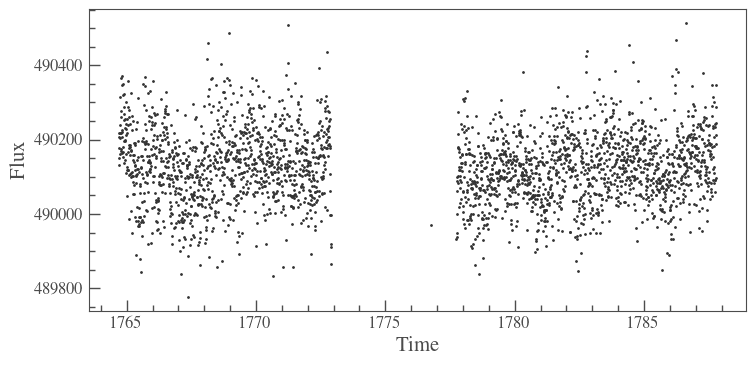

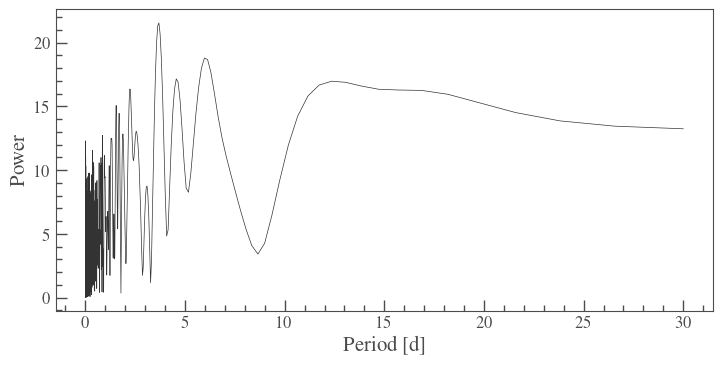

In [257]:

data = fits.getdata('MAST_2020-04-10T1336/TESS/tess2019279210107-s0017-0000000440109725-0161-s/tess2019279210107-s0017-0000000440109725-0161-s_lc.fits', 1)
t, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']
t, f, e = t[q==0], f[q==0], e[q==0]
#fit = np.polyval((np.polyfit(t,f,2)), t)
#f = (f/fit)-1
#e = (e/fit)
lc = lk.LightCurve(time=t, flux=f, flux_err=e )#.remove_outliers(sigma=5)
lc.bin(5).scatter()
pg = lc.to_periodogram(oversample_factor=10,minimum_period=4*u.minute, maximum_period=30*u.day)
pg.plot()

Nothing there really. 

In [265]:
2**6 

64